In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# 正态分布检验

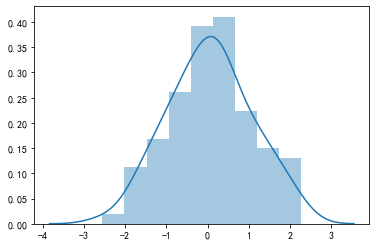

In [14]:
np.random.seed(0)
x = np.random.normal(size=100)
sns.distplot(x)  # 默认

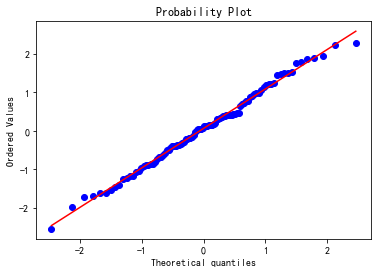

In [15]:
#Q-Q图
from scipy import stats
fig = plt.figure()
res = stats.probplot(x, plot=plt)
plt.show()

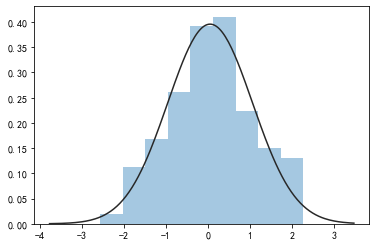

In [3]:
# 隐藏数据趋势kde，显示数据紧密度fit
sns.distplot(x, kde=False, fit=stats.gamma)

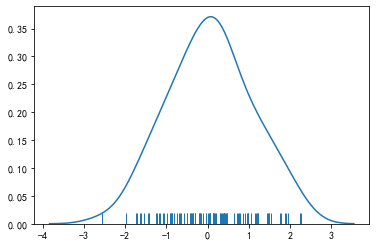

In [4]:
# 隐藏直方图 hist=False
sns.distplot(x, hist=False, rug=True) # rug=True表示显示 rugplot(x)

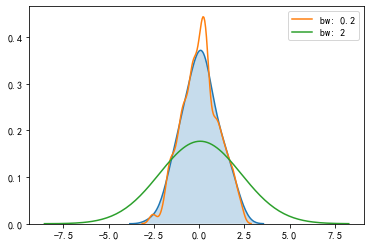

In [5]:
# 单变量 kdeplot()
sns.kdeplot(x, shade=True)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

In [22]:
import numpy as np
from scipy import stats

a = np.random.normal(0,1,50)
'''输出结果中第一个为统计量，第二个为P值（统计量越接近1越表明数据和正态分布拟合的好，
P值大于指定的显著性水平，接受原假设，认为样本来自服从正态分布的总体）'''
print("ShapiroResult{0}".format(stats.shapiro(a)))
print("\n")


'''输出结果中第一个为统计量，第二个为P值（注：统计量越接近0就越表明数据和标准正态分布拟合的越好，
如果P值大于显著性水平，通常是0.05，接受原假设，则判断样本的总体服从正态分布）'''
print(stats.kstest(a, 'norm')) 
print("\n")


'''输出结果中第一个为统计量，第二个为P值（注：p值大于显著性水平0.05，认为样本数据符合正态分布）'''
print(stats.normaltest(a))
print("\n")

print(stats.anderson(a, dist='norm'))
#第一个统计值，第二个评价值，当统计值大于评级值，拒绝原假设

ShapiroResult(0.9865769147872925, 0.8367087244987488)


KstestResult(statistic=0.0836062621675514, pvalue=0.8757343881240044)


NormaltestResult(statistic=1.1327461061342623, pvalue=0.5675802936271859)


AndersonResult(statistic=0.2661890253624861, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


# 数据变换

In [27]:
import math
np.log(a+1)#对数变换

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([ 0.41941067, -0.85752188,  0.1327401 , -0.38467535,  0.52563862,
        0.52753473, -1.29315883,         nan,         nan,  0.47646979,
               nan, -0.70687367, -0.90711803, -0.05399937,         nan,
        0.17292639,  0.42126695,  0.08472902, -0.37234881,  0.0929439 ,
        0.33579082,         nan,  1.08380734,  0.32937088, -1.05672758,
       -0.49586045,  0.40128423, -0.1234158 ,         nan,  1.11988209,
       -0.11714148,  0.70318301, -1.17781735,  0.93073671,  0.25180384,
        0.47551581,         nan,  0.79351061,  0.52462093,  0.83371151,
       -0.98909683, -0.65590365,  1.19510864,         nan, -0.1461243 ,
        0.75935214,  0.09323983,  0.45929252, -0.50990776,  0.31485153])

In [28]:
np.sqrt(a)#平方根变换

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.72184824,        nan, 0.37676672,        nan, 0.83158809,
       0.83351613,        nan,        nan,        nan, 0.7812678 ,
              nan,        nan,        nan,        nan,        nan,
       0.43448659, 0.72380317, 0.29735852,        nan, 0.31209   ,
       0.63170115,        nan, 1.39853935, 0.62457451,        nan,
              nan, 0.70266762,        nan,        nan, 1.43683432,
              nan, 1.010036  ,        nan, 1.23950678, 0.53511091,
       0.78028446,        nan, 1.10052046, 0.83055293, 1.14098476,
              nan,        nan, 1.51786584,        nan,        nan,
       1.06625108, 0.31260993, 0.76351403,        nan, 0.60832219])

In [29]:
1/a#倒数变换

array([  1.91914682,  -1.73675042,   7.04457707,  -3.13157222,
         1.44605056,   1.43936845,  -1.37817477,  -0.72287556,
        -0.63173652,   1.63832533,  -0.84114246,  -1.97310129,
        -1.67696874, -19.02323442,  -0.51645428,   5.29721068,
         1.90879392,  11.3093915 ,  -3.21661139,  10.26692293,
         2.50597458,  -0.36067324,   0.51127037,   2.56348915,
        -1.5327818 ,  -2.55784977,   2.02535018,  -8.61297221,
        -0.4924448 ,   0.48438046,  -9.04644522,   0.98022618,
        -1.44498262,   0.65088189,   3.49230676,   1.6424573 ,
        -0.95670584,   0.82566477,   1.44965739,   0.76813987,
        -1.5921347 ,  -2.07888487,   0.43404347,  -0.94338214,
        -7.35566165,   0.87959152,  10.23279949,   1.71540216,
        -2.50344832,   2.70229453])

In [30]:
np.arcsin(np.sqrt(a))#平方根反正弦变换

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


array([0.80646928,        nan, 0.38630331,        nan, 0.98196099,
       0.98544156,        nan,        nan,        nan, 0.89669434,
              nan,        nan,        nan,        nan,        nan,
       0.44946817, 0.80929829, 0.30192483,        nan, 0.31739212,
       0.68374569,        nan,        nan, 0.67458659,        nan,
              nan, 0.77913978,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.56463903,
       0.89512051,        nan,        nan, 0.98009975,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.31793943, 0.86873719,        nan, 0.65394494])

In [35]:
#Box-Cox变换
from scipy.stats import boxcox
y,lambda0 = boxcox(abs(a)) 
y

array([-0.60397251, -0.5173959 , -1.56255585, -1.00001369, -0.35315893,
       -0.34891303, -0.30885882,  0.3373377 ,  0.4852399 , -0.46586035,
        0.1765934 , -0.62764749, -0.48653966, -2.11948276,  0.71537797,
       -1.37695536, -0.59933548, -1.84432459, -1.02038534, -1.78930503,
       -0.82545586,  1.15372907,  0.72719255, -0.84365449, -0.4061596 ,
       -0.84189253, -0.64982282, -1.68608014,  0.7713776 ,  0.7909494 ,
       -1.71536955,  0.02001933, -0.35248198,  0.45206465, -1.08210757,
       -0.46810018,  0.0444925 ,  0.1959864 , -0.35544069,  0.27221248,
       -0.44033588, -0.67182152,  0.92297681,  0.05868867, -1.58960966,
        0.13027023, -1.78738838, -0.50652994, -0.82464468, -0.88556904])

# 偏度分析

In [2]:
def skew(data):  #计算特征列的偏态系数以及偏斜程度
    mean = Data.mean(axis=0)  #均值
    median = Data.median(axis=0)  #中位数
    std = Data.std(axis=0)  #标准差
    SK = (mean - median) / std  #偏度系数，SK的绝对值越小，偏斜程度越小
    sk = pd.DataFrame(SK).rename(columns={0: 'SK'})
    sk['feature'] = sk.index
    sk = pd.DataFrame(sk).rename(index=dict(
        zip(list(sk.index), list(range(len(sk.index))))),
                                 columns={0: 'SK'})
    sk['status'] = [
        '左偏态' if sk['SK'][i] < 0 else '右偏态' for i in range(len(sk['SK']))
    ]
    a = []
    for i in range(len(sk['SK'])):
        if abs(sk['SK'][i]) > 1:
            a.append('高度偏态')
        elif abs(sk['SK'][i]) < 0.5:
            a.append('轻度偏态')
        else:
            a.append('中度偏态')
    sk['degree'] = a
    skew = sk[['feature', 'SK', 'status', 'degree']]
    return skew

# 同分布检验

## KS检验

KS检验，也称为Kolmogorov-Smirnov检验，是一种用于检查一个样本是否符合特定分布的非参数统计检验方法。它比较了样本累积分布函数（ECDF）与理论累积分布函数（CDF）之间的差异。

KS检验可以用于比较两个样本是否来自相同的分布。这是通过比较两个样本的累积分布函数（ECDF）来完成的。下面是进行KS检验的基本步骤：

- 收集两个样本： 假设你有两个样本，分别是样本A和样本B。

- 计算两个样本的ECDF： 对于每个样本，计算并绘制累积分布函数。

- 比较两个样本的ECDF： 将样本A的ECDF与样本B的ECDF进行比较，找出它们之间的最大垂直差异。

- 计算KS统计量： 将最大垂直差异作为KS统计量。

- 进行假设检验： 将KS统计量与临界值进行比较，以确定是否有足够的证据拒绝原假设（即两个样本来自相同的分布）。

如果KS统计量小于临界值，你可能会得出两个样本来自相同分布的结论。反之，如果KS统计量较大，你可能会拒绝原假设，表示两个样本来自不同的分布。

![hellworld](../images/ks.jpeg)

**KS检验对样本量较大时更敏感，而对样本量较小时可能不够精确。**

In [3]:
from scipy.stats import ks_2samp
import numpy as np

# 生成两个样本数据
sample_a = np.random.normal(0, 1, 100)
sample_b = np.random.normal(0, 1.5, 120)

# 进行KS检验
statistic, p_value = ks_2samp(sample_a, sample_b)

# 打印结果
print("KS统计量:", statistic)
print("P值:", p_value)

# 判断是否拒绝原假设
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，两个样本来自不同分布")
else:
    print("无法拒绝原假设，两个样本可能来自相同分布")


KS统计量: 0.16833333333333333
P值: 0.08066415712526856
无法拒绝原假设，两个样本可能来自相同分布


## AD检验

In [4]:
from scipy.stats import anderson
import numpy as np

# 生成两个样本数据
sample_a = np.random.normal(0, 1, 100)
sample_b = np.random.normal(0, 1.5, 120)

# 合并两个样本
combined_sample = np.concatenate([sample_a, sample_b])

# 进行AD检验
result = anderson(combined_sample)

# 打印结果
print("AD统计量:", result.statistic)
print("临界值:", result.critical_values)
print("显著性水平:", result.significance_level)

# 判断是否拒绝原假设
alpha = 0.05
if result.statistic > result.critical_values[2]:
    print("拒绝原假设，两个样本不来自相同分布")
else:
    print("无法拒绝原假设，两个样本可能来自相同分布")


AD统计量: 0.1946767811653558
临界值: [0.566 0.645 0.773 0.902 1.073]
显著性水平: [15.  10.   5.   2.5  1. ]
无法拒绝原假设，两个样本可能来自相同分布


## KL散度

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option( 'display.precision',2)
%matplotlib inline

KL散度: inf


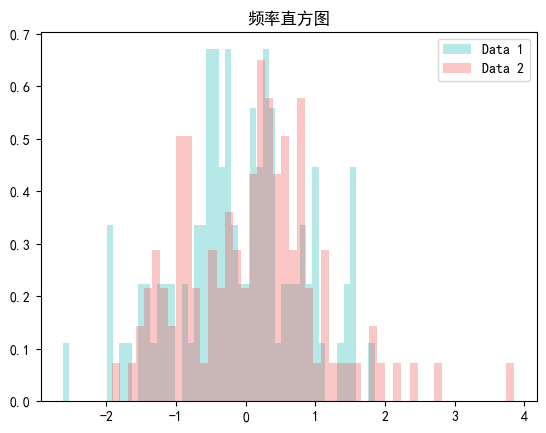

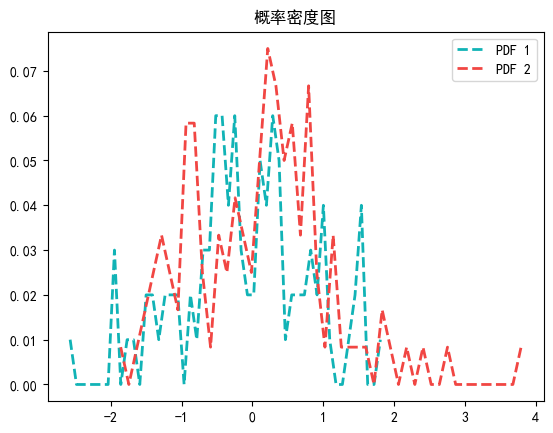

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

np.random.seed(42)
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

# 生成两个直方图
hist1, bins1 = np.histogram(data1, bins=50, density=True) # hist等于频率/组距
hist2, bins2 = np.histogram(data2, bins=50, density=True)

# 计算每个区间的概率密度
pdf1 = hist1 / np.sum(hist1)
pdf2 = hist2 / np.sum(hist2)

# 计算KL散度
kl_divergence = entropy(pdf1, pdf2)

# 打印结果
print("KL散度:", kl_divergence)

# 绘制直方图和概率密度函数
plt.figure()
plt.hist(data1, bins=bins1, density=True, alpha=0.3, color='#11b3b6', label='Data 1', histtype='stepfilled' )
plt.hist(data2, bins=bins2, density=True, alpha=0.3, color='#f14643', label='Data 2', histtype='stepfilled')
plt.legend() 
plt.title('频率直方图')

plt.figure()
plt.plot((bins1[:-1] + bins1[1:]) / 2, pdf1, color='#11b3b6', linestyle='dashed', linewidth=2, label='PDF 1')
plt.plot((bins2[:-1] + bins2[1:]) / 2, pdf2, color='#f14643', linestyle='dashed', linewidth=2, label='PDF 2')
# 显示图例和标题
plt.legend()
plt.title('概率密度图')

plt.show()

## KDE核密度估计

核密度估计（Kernel Density Estimation，KDE）是一种非参数统计方法，用于估计概率密度函数（PDF）的一种平滑版本。KDE通过在每个数据点周围放置核（通常是一个标准正态分布的函数），然后将这些核函数叠加在一起，形成整体的概率密度估计。

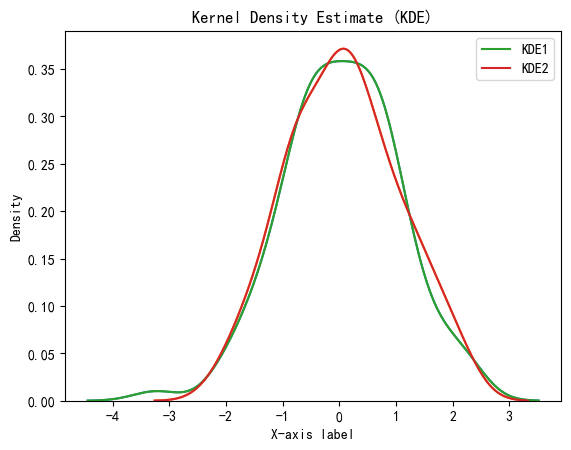

In [7]:
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

sns.kdeplot(data1)
sns.kdeplot(data2)
# 使用 Seaborn 绘制 KDE 曲线
sns.kdeplot(data1, label='KDE1')
sns.kdeplot(data2, label='KDE2')

# 添加标签和标题
plt.xlabel('X-axis label')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE)')

# 显示图例
plt.legend()

# 显示图形
plt.show()

## 累积分布函数

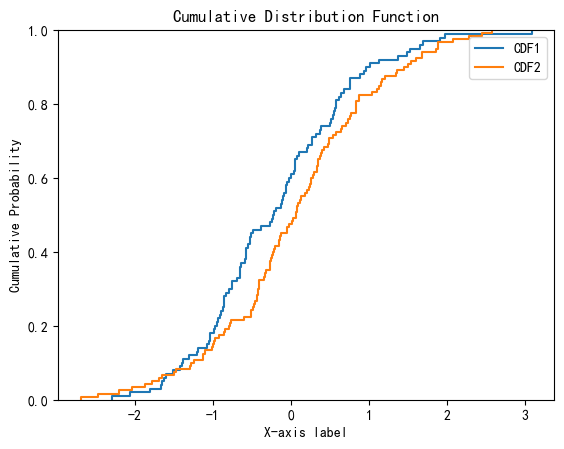

In [8]:
data1 = np.random.normal(0, 1, 100) # 数据一
data2 = np.random.normal(0, 1, 120) # 数据二

# 使用 Seaborn 绘制累积分布函数曲线
sns.ecdfplot(data=data1, label='CDF1')
sns.ecdfplot(data=data2, label='CDF2')

# 添加标签和标题
plt.xlabel('X-axis label')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')

# 显示图例
plt.legend()

# 显示图形
plt.show()